## Rescaling of blender-generated skybox texture images

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from os.path import sep
import imageio

np.random.seed(seed=3)
%config Completer.use_jedi = False  #magic to fix autocomplete issue
%matplotlib inline

### Parameter for texture rescaling

In [41]:
pt_per_cm = 150
dpiVal = 600
maxBit = 255 #assuming 8bit image depth

Path("skyboxTextures").mkdir(parents=True, exist_ok=True)

names = ['xPos','xNeg','yPos','yNeg','zPos','zNeg']

In [95]:
def plotTexture(img, maxBit):
    fig = plt.figure(frameon=False)
    fig.set_size_inches(3,3)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    ax.imshow(img,origin='upper', cmap='binary', vmin=0, vmax=maxBit)
    return fig

### Parameters for reshaping

In [197]:
import pandas as pd
from scipy.optimize import minimize
import scipy as sp

Dir = 'screenMeasurements/' #"/Volumes/jayaramanlab/Shivam/" #connect to dm11
rig = "Hannah" #"Shivam"#

if rig == "Shivam":
    file2 = rig+"Rig_mean_brightness_level_6.csv"
else:
    file2 = rig+"Rig_mean_brightness.csv"
    
file = rig+"Rig_lookup_table_transformed_brightness.csv"

lookupDf = pd.read_csv(Dir+file)
mean_brightness = pd.read_csv(Dir+file2)

In [199]:
npts = 1000
def rescale(img):
    x = img.flatten()
    y = np.array(lookupDf.iloc[x]['Iin'])
    imgT = y.reshape(np.shape(img))
    return imgT

def simulateI(img):
    x = img.flatten()
    y = np.array(transformDf.iloc[x]['Iin'])
    imgT = y.reshape(np.shape(img))
    return imgT

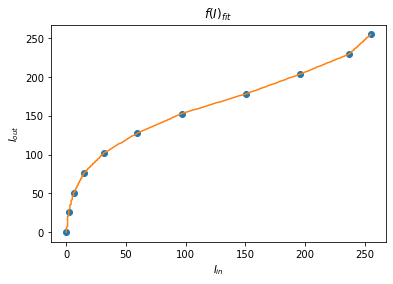

In [200]:
y = np.array(mean_brightness['I'].values)
x = np.arange(0,256,1)
y = np.zeros(x.shape)

b = sp.interpolate.interp1d(mean_brightness['I'], mean_brightness['Stim'],bounds_error=False)

def diff(x,a):
    yt = b(x)
    return (yt - a)**2

for idx,x_value in enumerate(x):
    res = minimize(diff, 1.0, args=(x_value), method='Nelder-Mead', tol=1e-6)
    y[idx] = res.x[0]

plt.plot(mean_brightness['I'].values,mean_brightness['Stim'].values,'o');
plt.plot(np.round(y).astype('int'),x)
plt.title(r'$f(I)_{fit}$')
plt.ylabel("$I_{out}$"); plt.xlabel("$I_{in}$");

transformDf = pd.DataFrame(np.array([np.round(y).astype('int'),x]).T, columns = ["Iin", "Iout"])

### Rescale sun disk images
#### Load images, rescale & reshape

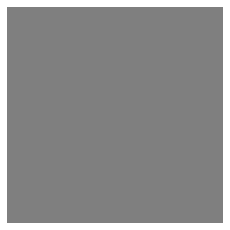

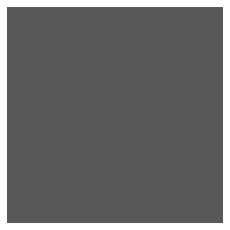

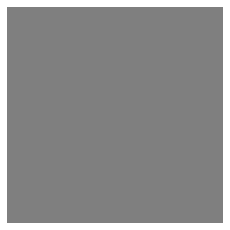

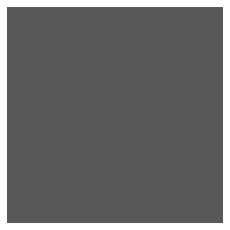

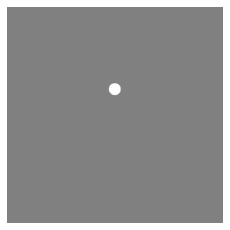

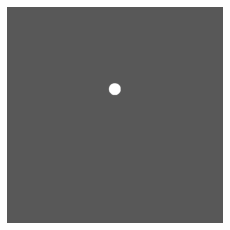

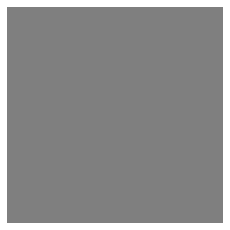

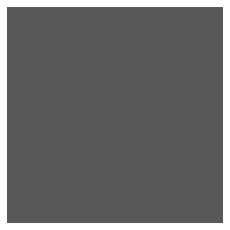

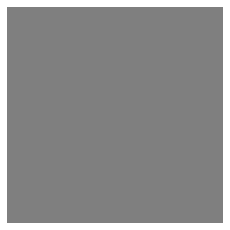

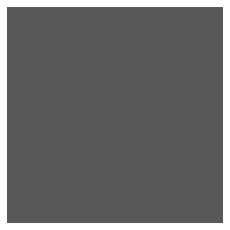

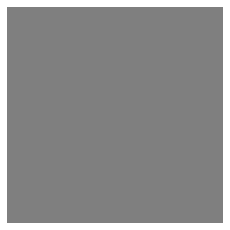

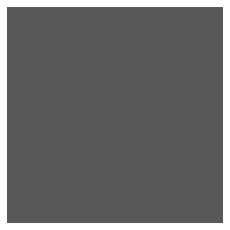

In [203]:
skybox = 'B2s'
greyvalBpan = (1/2 + (0.5-(1/maxBit)*0.5)*maxBit)
Path("skyboxTextures/rescaled/"+skybox).mkdir(parents=True, exist_ok=True)

for i, name in enumerate(names):
    im = imageio.imread(sep.join(['skyboxTextures','originals',skybox,name+'.png']))

    # since monocrome, choose just the first slice
    im = maxBit - im[:,:,0]
    
    med = np.median(im)
    if np.min(im) < (med - np.std(im)) and np.std(im) > 2:
        newtex = im.copy()
        newtex[newtex > (med - np.std(im))] = greyvalBpan
        newtex[newtex <= (med - np.std(im))] = 0
        fignew = plotTexture(newtex, maxBit)
        fignew.savefig(sep.join(['skyboxTextures','rescaled',skybox,name+'_rescaled.png']),dpi = dpiVal)
        
        fignew = plotTexture(rescale(newtex), maxBit) 
        fignew.savefig(sep.join(['skyboxTextures','rescaled',skybox,name+'_reshaped.png']),dpi = dpiVal)
    else:
        newtex = np.ones(im.shape)*greyvalBpan
        fignew = plotTexture(newtex, maxBit) 
        fignew.savefig(sep.join(['skyboxTextures','rescaled',skybox,name+'_rescaled.png']),dpi = dpiVal)
        
        fignew = plotTexture(rescale(newtex), maxBit) 
        fignew.savefig(sep.join(['skyboxTextures','rescaled',skybox,name+'_reshaped.png']),dpi = dpiVal)

### Rescale gradient images
#### Load images, rescale & reshape

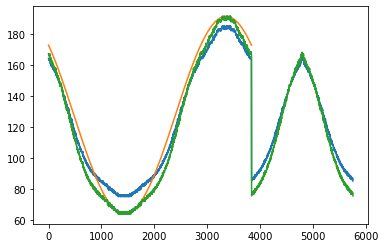

In [204]:
skybox = 'C2'
greyvalBpan = (1/2 + (0.5-(1/maxBit)*0.5)*maxBit)
Path("skyboxTextures/rescaled/"+skybox).mkdir(parents=True, exist_ok=True)

im = imageio.imread(sep.join(['skyboxTextures','originals',skybox,names[0]+'.png']))

    
gradvals = np.zeros(im.shape[0]*6)
for i, k in enumerate([2,0,3,1,4,5]):
    im = imageio.imread(sep.join(['skyboxTextures','originals',skybox,names[k]+'.png']))

    # since monocrome, choose just the first slice
    im = maxBit - im[:,:,0]    
    gradvals[i*im.shape[0]:(i+1)*im.shape[0]] = im[0,:]

panGradLow = (np.sin(np.linspace(np.pi,np.pi*3,im.shape[0]*4)-np.pi/4) + 2)*maxBit/4

gradvals_rescaled = (gradvals - np.min(gradvals))/np.max((gradvals - np.min(gradvals))) * (np.max(panGradLow)-np.min(panGradLow)) + np.min(panGradLow)
plt.plot(gradvals, label='original')
plt.plot(panGradLow, label='target')
plt.plot(gradvals_rescaled, label='rescaled')

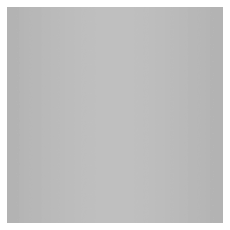

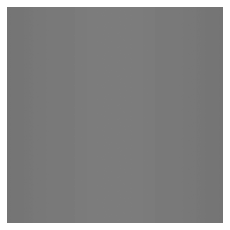

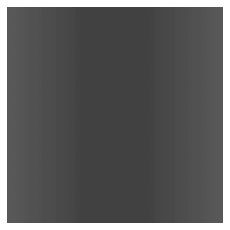

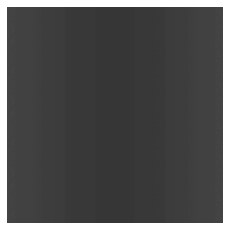

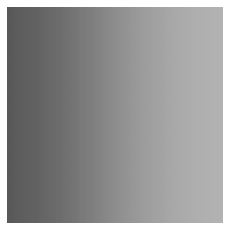

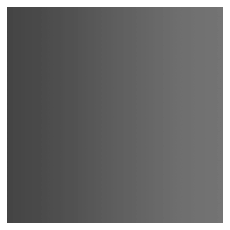

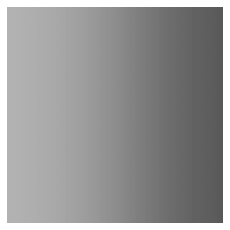

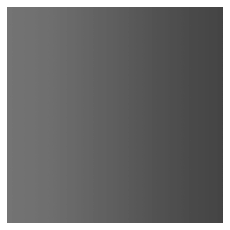

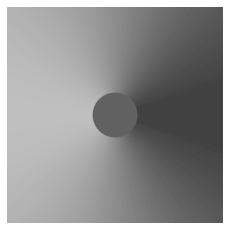

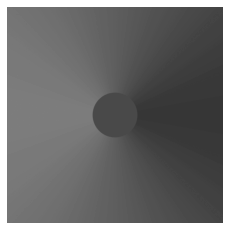

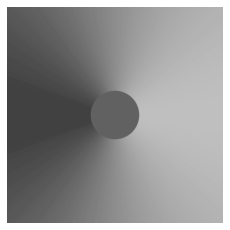

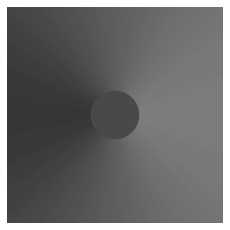

In [205]:
skybox = 'C2'
Path("skyboxTextures/rescaled/"+skybox).mkdir(parents=True, exist_ok=True)

for i, name in enumerate(names):
    im = imageio.imread(sep.join(['skyboxTextures','originals',skybox,name+'.png']))

    # since monocrome, choose just the first slice
    im = maxBit - im[:,:,0]
    
    #gradvals_rescaled = (gradvals - np.min(gradvals))/np.max((gradvals - np.min(gradvals))) * (np.max(panGradLow)-np.min(panGradLow)) + np.min(panGradLow)
    #im_rescaled = np.tile( (gradvals_rescaled[i*im.shape[0]:(i+1)*im.shape[0]]), im.shape[1] ).reshape(im.shape)
    im_rescaled = (im - np.min(gradvals))/np.max((gradvals - np.min(gradvals))) * (np.max(panGradLow)-np.min(panGradLow)) + np.min(panGradLow)
    
    fignew = plotTexture(im_rescaled, maxBit) 
    fignew.savefig(sep.join(['skyboxTextures','rescaled',skybox,name+'_rescaled.png']),dpi = dpiVal)
    
    fignew = plotTexture(rescale(im_rescaled), maxBit) 
    fignew.savefig(sep.join(['skyboxTextures','rescaled',skybox,name+'_reshaped.png']),dpi = dpiVal)